In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

In [31]:
def rbf_kernel_pca(x, gamma, n_components):
    """
    RBF kernel PCA implementation.
    Parameters
    -------------
    X: {Numpy ndarray}, shape = [n_samples, n_features]
    
    gamma = float
        Tunning paramter components to return
        
    Returns
    ----------------
    X_pc: {Numpy ndarray}, shape = [n_samples, k_features]
        Projected dataset
        """
    # calculate pairwise squared Euclidean distances
    # in the M * N dimensional dataset.
    sq_dists = pdist(x, 'sqeuclidean')
    
    # convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    
    # compute the symmetric kernel matrix
    K = exp(-gamma * mat_sq_dists)
    
    # Center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N,N)) /N
    K = K - np.dot(one_n, K) - np.dot(K, one_n) + np.dot(np.dot(one_n,K),one_n)
    
    # obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)
    
    # collect the top K eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components +1)))
    
    return X_pc

In [24]:
from sklearn.datasets import make_moons

In [25]:
x, y = make_moons(n_samples = 600, random_state = 123)

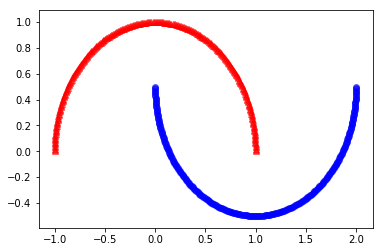

In [26]:
plt.scatter(x[y == 0,0], x[y == 0,1], color = 'red',marker = '^',alpha = 0.5)
plt.scatter(x[y == 1,0], x[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
plt.show()

In [27]:
x.shape, y.shape

((600, 2), (600,))

In [28]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components = 2)
X_spca = scikit_pca.fit_transform(x)



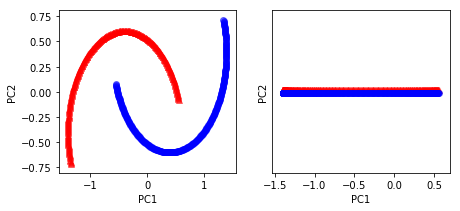

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7,3))

ax[0].scatter(X_spca[y==0, 0], X_spca[y == 0, 1], color = 'red',marker = '^', alpha = 0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y == 1, 1], color = 'blue',marker = 'o', alpha = 0.5)


ax[1].scatter(X_spca[y==0, 0], np.zeros((300,1))+0.02, color = 'red',marker = '^', alpha = 0.5)
ax[1].scatter(X_spca[y==0, 0],np.zeros((300,1))- 0.02, color = 'blue',marker = 'o', alpha = 0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
plt.show()


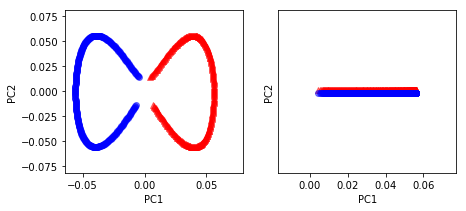

In [35]:
# now lets try our kernel PCA function rbf_kernel_pca, which we implemented above

from matplotlib.ticker import FormatStrFormatter
x_kpca = rbf_kernel_pca(x, gamma = 15, n_components = 2)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7,3))

ax[0].scatter(x_kpca[y==0, 0], x_kpca[y == 0, 1], color = 'red',marker = '^', alpha = 0.5)
ax[0].scatter(x_kpca[y==1, 0], x_kpca[y == 1, 1], color = 'blue',marker = 'o', alpha = 0.5)


ax[1].scatter(x_kpca[y==0, 0], np.zeros((300,1))+0.02, color = 'red',marker = '^', alpha = 0.5)
ax[1].scatter(x_kpca[y==0, 0],np.zeros((300,1))- 0.02, color = 'blue',marker = 'o', alpha = 0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
plt.show()

# Example 2-- separating concentric circles

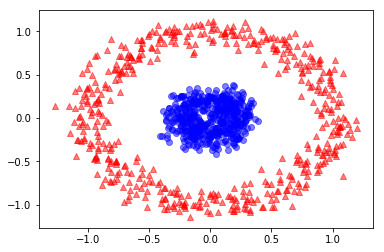

In [36]:
from sklearn.datasets import make_circles
x, y = make_circles(n_samples = 1000, random_state = 123, noise = 0.1, factor = 0.2)

plt.scatter(x[y== 0, 0], x[y== 0, 1], color = 'red', marker = '^', alpha = 0.5)

plt.scatter(x[y == 1, 0], x[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
plt.show()

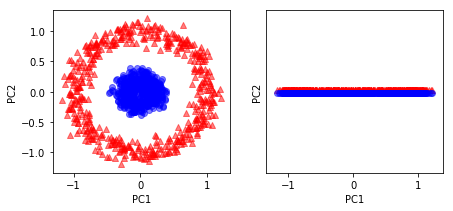

In [38]:
scikit_pca = PCA(n_components = 2)
x_spca = scikit_pca.fit_transform(x)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7,3))


ax[0].scatter(x_spca[y==0, 0], x_spca[y == 0, 1], color = 'red',marker = '^', alpha = 0.5)
ax[0].scatter(x_spca[y==1, 0], x_spca[y == 1, 1], color = 'blue',marker = 'o', alpha = 0.5)


ax[1].scatter(x_spca[y==0, 0], np.zeros((500,1))+0.02, color = 'red',marker = '^', alpha = 0.5)
ax[1].scatter(x_spca[y==0, 0],np.zeros((500,1))- 0.02, color = 'blue',marker = 'o', alpha = 0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
plt.show()

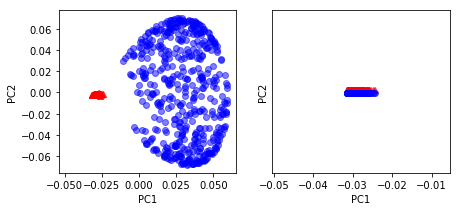

In [39]:
# given an appropriate value for gamma, let's see if we are lukier using the
# RBF kernel PCA implementation

x_kpca = rbf_kernel_pca(x, gamma = 15, n_components = 2)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7,3))

ax[0].scatter(x_kpca[y==0, 0], x_kpca[y == 0, 1], color = 'red',marker = '^', alpha = 0.5)
ax[0].scatter(x_kpca[y==1, 0], x_kpca[y == 1, 1], color = 'blue',marker = 'o', alpha = 0.5)


ax[1].scatter(x_kpca[y==0, 0], np.zeros((500,1))+0.02, color = 'red',marker = '^', alpha = 0.5)
ax[1].scatter(x_kpca[y==0, 0],np.zeros((500,1))- 0.02, color = 'blue',marker = 'o', alpha = 0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
plt.show()

# projecting new data points

In [40]:
def rbf_kernel_pca_mod(x, gamma, n_components):
    """
    RBF kernel PCA implementation.
    Parameters
    -------------
    X: {Numpy ndarray}, shape = [n_samples, n_features]
    
    gamma = float
        Tunning paramter of the RBF kernel
        
    n_components: int
        Number of principal components to return
        
    Returns
    ----------------
    X_pc: {Numpy ndarray}, shape = [n_samples, k_features]
        Projected dataset
        
    lambdas: list
    Eigenvalues
        """
    
    # calculate pairwise squared Euclidean distances
    # in the M * N dimensional dataset.
    sq_dists = pdist(x, 'sqeuclidean')
    
    # convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    
    # compute the symmetric kernel matrix
    K = exp(-gamma * mat_sq_dists)
    
    # Center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N,N)) /N
    K = K - np.dot(one_n, K) - np.dot(K, one_n) + np.dot(np.dot(one_n,K),one_n)
    
    # obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)
    
    # collect the top K eigenvectors (projected samples)
    alphas = np.column_stack((eigvecs[:, -i] for i in range(1, n_components +1)))
    
    
    # collect the corresponding eigenvalues
    lambdas = [eigvals[-i] for i in range(1, n_components+1)]
    return alphas, lambdas

In [46]:
# now using the RBF kernel PCA implemetation 
x, y = make_moons(n_samples = 100, random_state = 123)
alphas , lambdas = rbf_kernel_pca_mod(x, gamma = 15, n_components = 1)

In [47]:
x_new = x[25]
x_new

array([ 1.8713187 ,  0.00928245])

In [48]:
x_proj = alphas[25] # original projection
x_proj

array([ 0.07877284])

In [51]:
def project_x(x_new, x, gamma , alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in x])
    k = np.exp(-gamma * pair_dist)
    return np.dot(k, (alphas/ lambdas))

In [52]:
x_reproj = project_x(x_new, x, gamma = 15, alphas = alphas,lambdas = lambdas)
x_reproj

array([ 0.07877284])

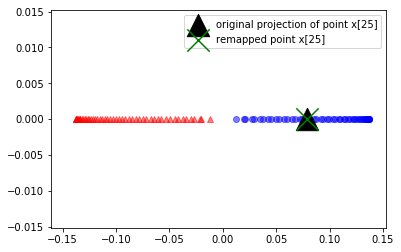

In [54]:
plt.scatter(alphas[y == 0, 0], np.zeros((50)), color = 'red', marker = '^', alpha = 0.5)
plt.scatter(alphas[y == 1, 0], np.zeros((50)), color = 'blue', marker = 'o', alpha = 0.5)

plt.scatter(x_proj, 0, color = 'black',label = 'original projection of point x[25]', marker = '^',s = 500)
plt.scatter(x_reproj, 0, color = 'green', label = 'remapped point x[25]', marker = 'x',s = 500)

plt.legend(scatterpoints = 1)
plt.show()

# kernel principal component analysis in scikit_learn

In [55]:
from sklearn.decomposition import KernelPCA
x, y = make_moons(n_samples = 100, random_state = 123)
scikit_kpca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 15)
X_skernpca = scikit_kpca.fit_transform(x)

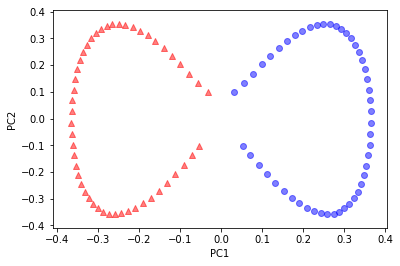

In [56]:
plt.scatter(X_skernpca[y ==0, 0], X_skernpca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X_skernpca[y ==1, 0], X_skernpca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()